<a href="https://colab.research.google.com/github/AzadMehedi/ML-Projects/blob/main/image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import numpy as np
a = np.array([[1,2,3,4,5],[4,5,6,7,8]])
print(a)
a.ndim

[[1 2 3 4 5]
 [4 5 6 7 8]]


2

In [25]:
# to comvert Matrix to vector or higher order to single dimention, use flatten() method
a.flatten()


array([1, 2, 3, 4, 5, 4, 5, 6, 7, 8])

# Imags
- Download manually the images from google
- download dataset from kaggle.com
- Build a Image web crawler
- Use python libraries to scrape the images (using)

In [ ]:
# instaling bing image downoader for download images
!pip install bing-image-downloader

In [2]:
# creating image folder
!mkdir images

In [ ]:
# download flower images
from bing_image_downloader import downloader
downloader.download('flower', limit=100, output_dir='images', adult_filter_off=True)

In [ ]:
# download bird images
downloader.download('bird', limit=100, output_dir='images', adult_filter_off=True)

In [ ]:
# download ice-creme images
downloader.download('ice-creme', limit=100, output_dir='images', adult_filter_off=True)

In [ ]:
# download cat images
downloader.download('cat', limit=100, output_dir='images', adult_filter_off=True)

In [ ]:
# download dog images
downloader.download('dog', limit=100, output_dir='images', adult_filter_off=True)

# Preprocessing
1. Resize
2. Flatten

In [16]:
import os
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.transform import resize 





In [28]:
target = []
images = []
flat_data = []

DATADIR = '/content/images'
CATEGORIES = ['bird','cat','dog','flower','ice-creme']

for category in CATEGORIES:
  class_num = CATEGORIES.index(category)   # label encoding the values
  path = os.path.join(DATADIR, category)   # create path to use all the images
  for img in os.listdir(path):
    img_array = imread(os.path.join(path, img))
    # print(img_array.shape) # height, width, depth
    # plt.imshow(img_array)    # showing a single image
    img_resized = resize(img_array,(150,150,3))   # resizing images
    flat_data.append(img_resized.flatten())       # flatting images
    images.append(img_resized)
    target.append(class_num)

flat_data = np.array(flat_data)
target = np.array(target)
images = np.array(images) 

/usr/local/lib/python3.8/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


In [34]:
len(flat_data[0])

67500

In [36]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,

<BarContainer object of 5 artists>

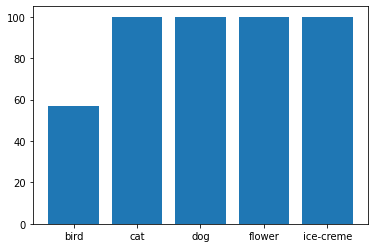

In [38]:
unique, count = np.unique(target, return_counts=True)
plt.bar(CATEGORIES, count)

# Split data into trainig and testing

In [39]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(flat_data, target, test_size = 0.3, random_state=109)  # here output as target


In [42]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
param_grid = [
    {'c':[1,10,100,1000], 'karnel':['linear']},
    {'c':[1,10,100,1000], 'gamma':[0.001, 0.0001], 'karnel':['rbf']}
  ]

svc = svm.SVC(probability=True)
clf = GridSearchCV(svc, param_grid)
clf.fit(x_train, y_train)

ValueError: ignored